# Test Univariados

A continuacion se presentan algunos ejemplos de test Univariados. Basados en los notebooks [link1](https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce) y [link2](https://github.com/edbullen/Hypothesis).

## Z-test

In [1]:
!wget "https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis testing/blood_pressure.csv"

--2021-10-08 23:45:51--  https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/blood_pressure.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2851 (2.8K) [text/plain]
Saving to: ‘blood_pressure.csv’

blood_pressure.csv  100%[===================>]   2.78K  --.-KB/s    in 0s      

2021-10-08 23:45:51 (51.2 MB/s) - ‘blood_pressure.csv’ saved [2851/2851]



In [4]:
df.describe()

,patient,bp_before,bp_after
count,120.000000,120.000000,120.000000
mean,60.500000,156.450000,151.358333
std,34.785054,11.389845,14.177622
min,1.000000,138.000000,125.000000
25%,30.750000,147.000000,140.750000
50%,60.500000,154.500000,149.500000
75%,90.250000,164.000000,161.000000
max,120.000000,185.000000,185.000000


156.45

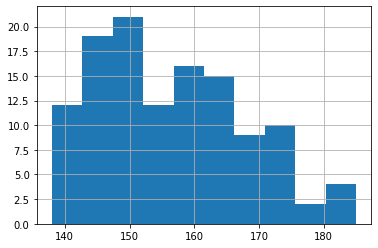

In [16]:
df['bp_before'].hist()
np.mean(df['bp_before'].values)

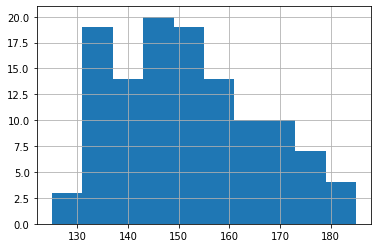

In [12]:
df['bp_after'].hist()

In [15]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats import weightstats as stests

df = pd.read_csv("blood_pressure.csv")
ztest, pval = stests.ztest(df['bp_before'], x2=None, value=156, alternative = 'smaller')
print(float(pval))
if pval<0.05: # Es menor a 5%
    print("Rechazar hipotesis nula")
else:
    print("Aceptar hipotesis nula")

0.6674192634872469
Aceptar hipotesis nula


In [10]:
ztest

0.432798073526164

### Z-test de 2 muestras

En este caso verficamos si la media muestral de dos grupos es igual o no.

In [11]:
ztest, pval1 = stests.ztest(df['bp_before'], x2=df['bp_after'], value=0, alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("Rechazar hipotesis nula")
else:
    print("Aceptar hipotesis nula")

0.002162306611369422
Rechazar hipotesis nula


## T-test

### De una muestra

In [17]:
!wget https://raw.githubusercontent.com/edbullen/Hypothesis/master/ages.csv

--2021-10-08 23:57:50--  https://raw.githubusercontent.com/edbullen/Hypothesis/master/ages.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42 [text/plain]
Saving to: ‘ages.csv’

ages.csv            100%[===================>]      42  --.-KB/s    in 0s      

2021-10-08 23:57:50 (2.41 MB/s) - ‘ages.csv’ saved [42/42]



In [25]:
ages = pd.read_csv("ages.csv", names = ['ages'])

In [27]:
ages['ages'].values

array([32, 34, 29, 29, 22, 39, 38, 37, 38, 36, 30, 26, 22, 22])

In [93]:
from scipy.stats import ttest_1samp
import numpy as np

# ages = np.genfromtxt("ages.csv",  delimiter=",")
# ages = np.random.randint(29,31,10)
ages = 29.8 + np.sqrt(10.0)*np.random.randn(30,1)

ages_mean = np.mean(ages)
print(ages_mean)

tset, pval = ttest_1samp(ages, 30)
print("p-values",pval)
if pval < 0.05:    # valor de alpha 0.05 o 5%
   print("Se rechaza la hipotesis nula")
else:
  print("Se acepta la hipotesis nula")

30.14241034225317
p-values [0.80093163]
Se acepta la hipotesis nula


### De dos muestras

Suponga que la semana pasada, la cantidad promedio de tiempo utilizado por visita en un pagina web fue de 25 min. 
Esta semana, el promedio empleado por visitante a la pagina web fue de 28 min. Cambió la media de tiempo utilizada por cada visitante? O es parte de las fluctuaciones naturales?

In [94]:
!wget https://raw.githubusercontent.com/edbullen/Hypothesis/master/week1.csv
!wget https://raw.githubusercontent.com/edbullen/Hypothesis/master/week2.csv

--2021-10-09 00:10:36--  https://raw.githubusercontent.com/edbullen/Hypothesis/master/week1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 596 [text/plain]
Saving to: ‘week1.csv’

week1.csv           100%[===================>]     596  --.-KB/s    in 0s      

2021-10-09 00:10:36 (16.6 MB/s) - ‘week1.csv’ saved [596/596]

--2021-10-09 00:10:37--  https://raw.githubusercontent.com/edbullen/Hypothesis/master/week2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 594 [text/plain]
Saving to: ‘week2.csv’

week2.csv           10

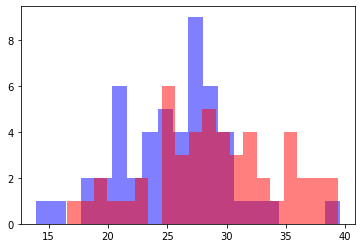

In [103]:
import numpy as np
import matplotlib.pyplot as plt

week1 = np.genfromtxt("week1.csv",  delimiter=",")
week2 = np.genfromtxt("week2.csv",  delimiter=",")

plt.hist(week1, bins=20, color='b', alpha=0.5)
plt.hist(week2, bins=20, color='r', alpha=0.5)
plt.show()

In [97]:
week1.shape

(50,)

In [104]:
from scipy.stats import ttest_ind

print("week1 data :-\n")
print(week1)
print("week2 data :-\n")
print(week2)

week1_mean = np.mean(week1)
week2_mean = np.mean(week2)

print("week1 mean value:",week1_mean)
print("week2 mean value:",week2_mean)

week1_std = np.std(week1)
week2_std = np.std(week2)

print("week1 std value:",week1_std)
print("week2 std value:",week2_std)

ttest,pval = ttest_ind(week1, week2)
print("p-value",pval)
if pval <0.05:
  print("Rechazar hipotesis nula")
else:
  print("Aceptar hipotesis nula")

week1 data :-

[23.90506824 26.67631982 27.27433886 24.25757125 32.40423483 39.56919357
 23.07010059 29.82068109 27.59433809 28.05639569 27.06757262 30.41192979
 25.71358554 24.94294823 28.23123807 24.95337555 18.51231639 27.46234762
 28.38016611 13.91205901 29.02615866 26.90746774 22.8677726  24.8938289
 25.96947935 26.86869621 20.72676456 27.35988314 20.68408581 21.19846143
 16.25800931 23.92517681 24.47923229 29.47050863 27.28425372 26.93339272
 28.61026924 18.88377042 33.65468651 25.69470077 20.98291356 22.69700387
 28.60278855 21.36000443 30.77685156 20.83415999 23.79367158 19.7556718
 29.54421084 20.1433138 ]
week2 data :-

[18.63431907 31.28788036 34.96797943 21.81678117 28.21619974 39.39313736
 35.52223207 27.54222109 33.64395433 25.31673581 28.81392191 30.7358016
 26.37241881 26.0945555  26.34073477 19.42196017 32.58797652 24.84001926
 28.93348335 20.43667584 22.72495967 32.31728012 35.384306   29.66709637
 24.53512973 30.91406007 19.56117513 24.90816833 30.13163726 31.4746619

### Paired sampled t-test

H0 : la diferencia entre 2 muestras es 0 <br>
H1: la diferencia entre 2 muestras no es 0

En este ejemplo se busca verificar si la presion arterial cambia entre antes de un procedimiento o despues del mismo.

In [105]:
import pandas as pd
from scipy import stats
df = pd.read_csv("blood_pressure.csv")
df[['bp_before','bp_after']].describe()
ttest, pval = stats.ttest_rel(df['bp_before'], df['bp_after'])
print(pval)
if pval <0.05:
  print("Rechazar hipotesis nula")
else:
  print("Aceptar hipotesis nula")

0.0011297914644840823
Rechazar hipotesis nula


## F-test

### One way

Para este ejemplo existe 3 diferentes categorias de plantas y su peso. Se require verificar que los 3 grupos son similares o no.

In [107]:
!wget "https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis testing/PlantGrowth.csv"

--2021-10-09 00:16:33--  https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/PlantGrowth.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 518 [text/plain]
Saving to: ‘PlantGrowth.csv’

PlantGrowth.csv     100%[===================>]     518  --.-KB/s    in 0s      

2021-10-09 00:16:34 (22.5 MB/s) - ‘PlantGrowth.csv’ saved [518/518]



In [116]:
df_anova = pd.read_csv('PlantGrowth.csv')
df_anova = df_anova[['weight','group']]
grps = pd.unique(df_anova.group.values)
d_data = {grp:df_anova['weight'][df_anova.group == grp] for grp in grps}
 
F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])
print("p-value for significance is: ", p)
if p <0.01:
  print("Rechazar hipotesis nula")
else:
  print("Aceptar hipotesis nula")

p-value for significance is:  0.0159099583256229
Aceptar hipotesis nula


In [114]:
df_anova = pd.read_csv('PlantGrowth.csv')
df_anova.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [119]:
np.mean(d_data['trt2'])

5.526

### Two ways

Se analiza un campo de maiz por factores, estos factores se emplean como grupos.

In [122]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_anova2 = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/crop_yield.csv")

df_anova2.head()

,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8
3,A,High,35.2
4,A,High,33.0


In [123]:
model = ols('Yield ~ C(Fert)*C(Water)', df_anova2).fit()

print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
res = sm.stats.anova_lm(model, typ= 2)
res

Overall model F( 3, 16) =  4.112, p =  0.0243


,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.766000,0.028847
C(Water),63.368,1.0,5.280667,0.035386
C(Fert):C(Water),15.488,1.0,1.290667,0.272656
Residual,192.000,16.0,NaN,NaN


## Chi-square test

Por ejemplo, en el resumen de una votacion, los votantes pueden ser clasificados por genero (hombre o mujer) y su preferencia (Democrata, Republicano, o Independiente). Se puede usar Chi-square para determinar si el genero esta relacionado con la preferencia de voto.

In [124]:
!wget https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/chi-test.csv

--2021-10-09 00:28:22--  https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/chi-test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109 [text/plain]
Saving to: ‘chi-test.csv’

chi-test.csv        100%[===================>]     109  --.-KB/s    in 0s      

2021-10-09 00:28:22 (5.92 MB/s) - ‘chi-test.csv’ saved [109/109]



In [126]:
df_chi = pd.read_csv('chi-test.csv')
df_chi.tail()

,Gender,Like Shopping?
4,Female,Yes
5,Male,Yes
6,Male,No
7,Female,No
8,Female,No


In [127]:
contingency_table=pd.crosstab(df_chi["Gender"],df_chi['Like Shopping?'])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)

alpha = 0.05

from scipy.stats import chi2

chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 Like Shopping?  No  Yes
Gender                 
Female           2    3
Male             2    2
Observed Values :-
 [[2 3]
 [2 2]]
Expected Values :-
 [[2.22222222 2.77777778]
 [1.77777778 2.22222222]]
Degree of Freedom:- 1
chi-square statistic:- 0.09000000000000008
critical_value: 3.841458820694124
p-value: 0.7641771556220945
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.09000000000000008
critical_value: 3.841458820694124
p-value: 0.7641771556220945
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
